In [113]:
from fastai.tabular.all import *

In [114]:
train = pd.read_csv("spaceship-titanic/train.csv")
test = pd.read_csv("spaceship-titanic/test.csv")
splits = RandomSplitter(valid_pct=0.2)(train)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [115]:
dls = TabularPandas(df=train, 
                    splits=splits, 
                    procs=[Categorify, FillMissing, Normalize], 
                    y_names="Transported", 
                    y_block=CategoryBlock(), 
                    cat_names=["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"], 
                    cont_names=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']).dataloaders()

/home/mrrobot/miniconda3/lib/python3.12/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/home/mrrobot/miniconda3/lib/python3.12/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [116]:
type(dls)

fastai.tabular.data.TabularDataLoaders

In [117]:
dls.show()
dls.train_ds

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
6948,7374_01,Mars,True,F/1527/P,TRAPPIST-1e,False,False,False,True,False,False,False,30.0,0.0,0.0,0.0,0.0,0.0,True
3012,3269_01,Europa,False,C/122/S,55 Cancri e,False,False,False,False,False,False,False,35.0,74.0,5082.0,0.0,893.0,1937.0,True
5807,6143_01,Earth,False,F/1175/S,TRAPPIST-1e,False,True,False,False,False,False,False,27.0,3.0,791.0,0.0,362.0,0.0,True
3169,3418_01,Mars,True,F/646/S,TRAPPIST-1e,False,False,True,False,False,False,False,72.0,0.0,0.0,0.0,0.0,0.0,True
3006,3256_01,Europa,True,E/217/S,55 Cancri e,False,False,False,False,False,False,False,54.0,0.0,0.0,0.0,0.0,0.0,True
8027,8594_01,Earth,False,G/1381/S,TRAPPIST-1e,False,False,False,False,False,False,False,37.0,210.0,3.0,601.0,1.0,68.0,False
6841,7229_01,Earth,False,F/1391/S,PSO J318.5-22,False,False,False,False,False,False,False,57.0,0.0,1.0,0.0,664.0,19.0,False
4549,4841_01,Europa,True,B/192/S,55 Cancri e,False,False,False,False,False,False,False,59.0,0.0,0.0,0.0,0.0,0.0,True
3513,3773_02,Earth,False,F/711/S,TRAPPIST-1e,False,False,False,False,False,False,False,42.0,55.0,0.0,1503.0,0.0,0.0,True
893,0961_01,Earth,False,G/141/P,55 Cancri e,False,False,False,False,False,False,False,14.0,0.0,885.0,8.0,0.0,0.0,True


      PassengerId  HomePlanet  CryoSleep  Cabin  Destination       Age  VIP  \
6948         6949           3          2   2948            3  0.083493    1   
3012         3013           2          1    636            1  0.433901    1   
5807         5808           1          1   2449            3 -0.126751    1   
3169         3170           3          2   4050            3  3.026919    1   
3006         3007           2          2   1584            1  1.765451    1   
...           ...         ...        ...    ...          ...       ...  ...   
7782         7783           2          2      6            3  0.363820    1   
1992         1993           1          1   3733            2 -1.107893    1   
5457         5458           1          1   6465            0 -0.547241    1   
7775         7776           1          1   5055            3 -2.018954    1   
2813         2814           1          1   5779            3 -2.018954    1   

      RoomService  FoodCourt  ShoppingMall       Sp

In [120]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10, 10])
learn.fit_one_cycle(5, lr_max=0.002)

epoch,train_loss,valid_loss,accuracy,time
0,0.535421,0.462277,0.780207,00:03
1,0.197563,0.534317,0.745109,00:03
2,0.096995,0.559742,0.770426,00:03
3,0.033980,0.590061,0.772727,00:03
4,0.013915,0.598788,0.775029,00:03


In [121]:
learn.show_results()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Age_na,RoomService_na,FoodCourt_na,ShoppingMall_na,Spa_na,VRDeck_na,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Transported_pred
0,7678.0,1.0,1.0,3181.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.415043,0.588969,-0.286148,-0.280048,-0.168057,-0.265843,0.0,0.0
1,1371.0,1.0,2.0,5406.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.897649,-0.341463,-0.286148,-0.280048,-0.273556,-0.265843,1.0,1.0
2,2192.0,1.0,2.0,5627.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.528383,-0.341463,-0.286148,-0.280048,-0.273556,-0.265843,0.0,1.0
3,6257.0,1.0,2.0,4668.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-0.967730,-0.341463,-0.286148,-0.280048,-0.273556,-0.265843,1.0,1.0
4,1647.0,3.0,2.0,3609.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.485125,-0.341463,-0.286148,-0.280048,-0.273556,-0.265843,1.0,1.0
5,2069.0,2.0,1.0,40.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.994554,-0.338351,1.073591,-0.225448,-0.268191,-0.091580,1.0,1.0
6,3359.0,1.0,2.0,5931.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.827567,-0.341463,-0.286148,-0.280048,-0.273556,-0.265843,1.0,1.0
7,1421.0,1.0,1.0,3548.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.827567,0.154871,-0.173904,-0.280048,-0.273556,0.065081,0.0,0.0
8,8558.0,1.0,1.0,5242.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,-0.126751,-0.332128,-0.286148,-0.280048,0.441692,-0.263202,0.0,0.0


In [122]:
test_dl = dls.test_dl(test)

/home/mrrobot/miniconda3/lib/python3.12/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/home/mrrobot/miniconda3/lib/python3.12/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [123]:
preds, _ = learn.get_preds(dl=test_dl, ds_idx=1)
preds

tensor([[0.0951, 0.9049],
        [0.9881, 0.0119],
        [0.0058, 0.9942],
        ...,
        [0.0136, 0.9864],
        [0.0259, 0.9741],
        [0.0787, 0.9213]])

In [124]:
test["Transported"] = (preds[:, 1] > 0.5).int()

In [125]:
test["Transported"] = (test["Transported"] == 1).astype(bool)

In [126]:
sub_df = test[["PassengerId", "Transported"]].copy()
sub_df.to_csv("submission.csv", index=False)
!head submission.csv

PassengerId,Transported
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,False
0027_01,False
0029_01,True
0032_01,True
0032_02,True


SuggestedLRs(slide=0.004365158267319202, valley=0.0012022644514217973)

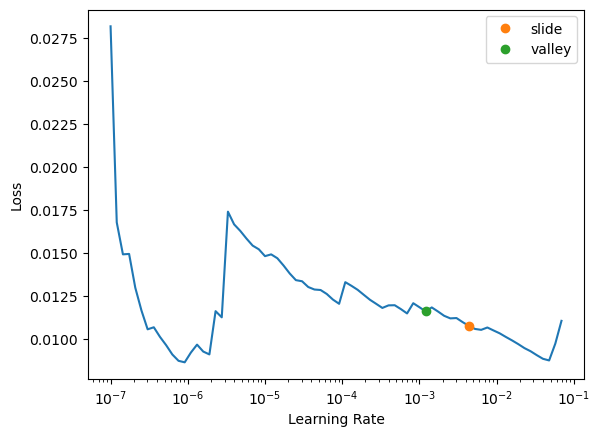

In [127]:
learn.lr_find(suggest_funcs=(slide, valley))

epoch,train_loss,valid_loss,accuracy,time
0,0.013573,0.006510,1.000000,00:03
1,0.006001,0.003420,0.999532,00:03
2,0.009217,0.241249,0.941782,00:03


KeyboardInterrupt: 